<img align='left' alt='ESO Logo' src='http://archive.eso.org/i/esologo.png'>  

# &nbsp; ESO Science Archive Programmatic: HOWTOs

## HOW TO Obtain Archival ESO Data Over The Area Covered By A Gravitational Wave Event

This notebook guides the users on how to query for science-ready data from ESO within the probability contours from Gravitational Wave Event. This makes use of the Gravitational-Wave Candidate Event Database (GraceDB) [gracedb.ligo.org](https://gracedb.ligo.org/) database (see [Singer and Price, 2016](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.93.024013) for more details on `BAYESTAR`). The GraceDB is a service operated by the LIGO Scientific Collaboration. It provides a centralized location for aggregating and retrieving information about candidate gravitational-wave events. GraceDB provides an API for programmatic access, and a client package is available for interacting with the API.

**Requirements**: This note makes use of a number of additional requirements within ``ESOAsg.ancillary.astro``, including ``ligo.skymap`` and ``healpy`` that can easily installed with ``pip`` in python version 3.10.15. 

**Usage**: You can access this file as an interactive jupyter notebook, which you can download and run on your machine [(instructions)](https://jupyter.org/install). To interact with the jupyter notebook (if you have download it): move up and down the various cells using the arrow keys, execute the code by pressing CTRL+ENTER; you can also modify the code and execute it at will.

**Version**: Please note that this notebook uses Python version 3.10.15 and Jupyter Notebook version 6.4.10. Compatibility with other versions cannot be guaranteed.

**Authors**: Emanuele Paolo Farina & Ashley Thomas Barnes

**Table of Content**

0. [**Imports - inc. ESOAsg package**](#imports)
1. [**Get credibility contours for a GW (super) event**](#get_contours) 
2. [**Query the ESO Archive to collect data within the contours**](#query)
    1. [**Archive Science Portal Query**](#science_archive)
    2. [**Programmatic access**](#programmatic)
    3. [**Downloading the Data**](#download)

---
## <a id='imports'>0. Imports - inc. ESOAsg package</a>

In [1]:
import warnings # Ignore warnings
warnings.filterwarnings("ignore") # Ignore warnings
import matplotlib.pyplot as plt # Matplotlib

from ESOAsg.ancillary import astro # Import the astro module from the ESOAsg package
from ESOAsg.ancillary import polygons # Import the polygons module from the ESOAsg package
from ESOAsg import archive_observations # Import the archive_observations module from the ESOAsg package
from ESOAsg import archive_science_portal # Import the archive_science_portal module from the ESOAsg package

# Set the default font size and weight for plots
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


---
## <a id='get_contours'>1. Get credibility contours for a GW (super) event </a>

To begin, you need to have on your disk a `bayestar.fits.gz` maps associated to a GW superevent (see [Singer and Price, 2016](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.93.024013) for more details on `BAYESTAR`). This is necessary to extract the probability contours for the event you would like to explore.

If not, you can download it from [gracedb.ligo.org](https://gracedb.ligo.org/) using:
```python
astro.download_gw_bayestar(super_event_name)
```

Where, for this example: `super_event_name='S191205ah'`

In [2]:
output_dir = './data/' # Set the output directory
event_name = 'S191205ah' # Set the (super)event name ID
# event_name = 'S241206ai' # Set the (super)event name ID - possible example alternative

astro.download_gw_bayestar(event_name, output_dir=output_dir) # Download the GW skymap

[WARNING] :: Already downloaded: https://gracedb.ligo.org/apiweb/superevents/S191205ah/files/bayestar.fits.gz


Now you can extract the contours associated to a given `credible_level`:

In [3]:
input_file = f"{output_dir}{event_name}_bayestar.fits.gz" # Set the input file
credible_level = 5. # Set the credible level
contours = astro.contours_from_gw_bayestar(input_file, credible_level=credible_level) # Get the contours

[INFO]    :: Extracted the contours for 1 regions at 5.0 credible level


and check the result using:
```python
astro.show_contours_from_gw_bayestar(bayestar_file, contours=contours)
```

2024-12-06 17:15:37,348 INFO NSIDE = 256
2024-12-06 17:15:37,350 INFO ORDERING = NESTED in fits file
2024-12-06 17:15:37,350 INFO INDXSCHM = IMPLICIT
2024-12-06 17:15:37,414 INFO Ordering converted to RING


Saving figure to ./figures/S191205ah_bayestar.png


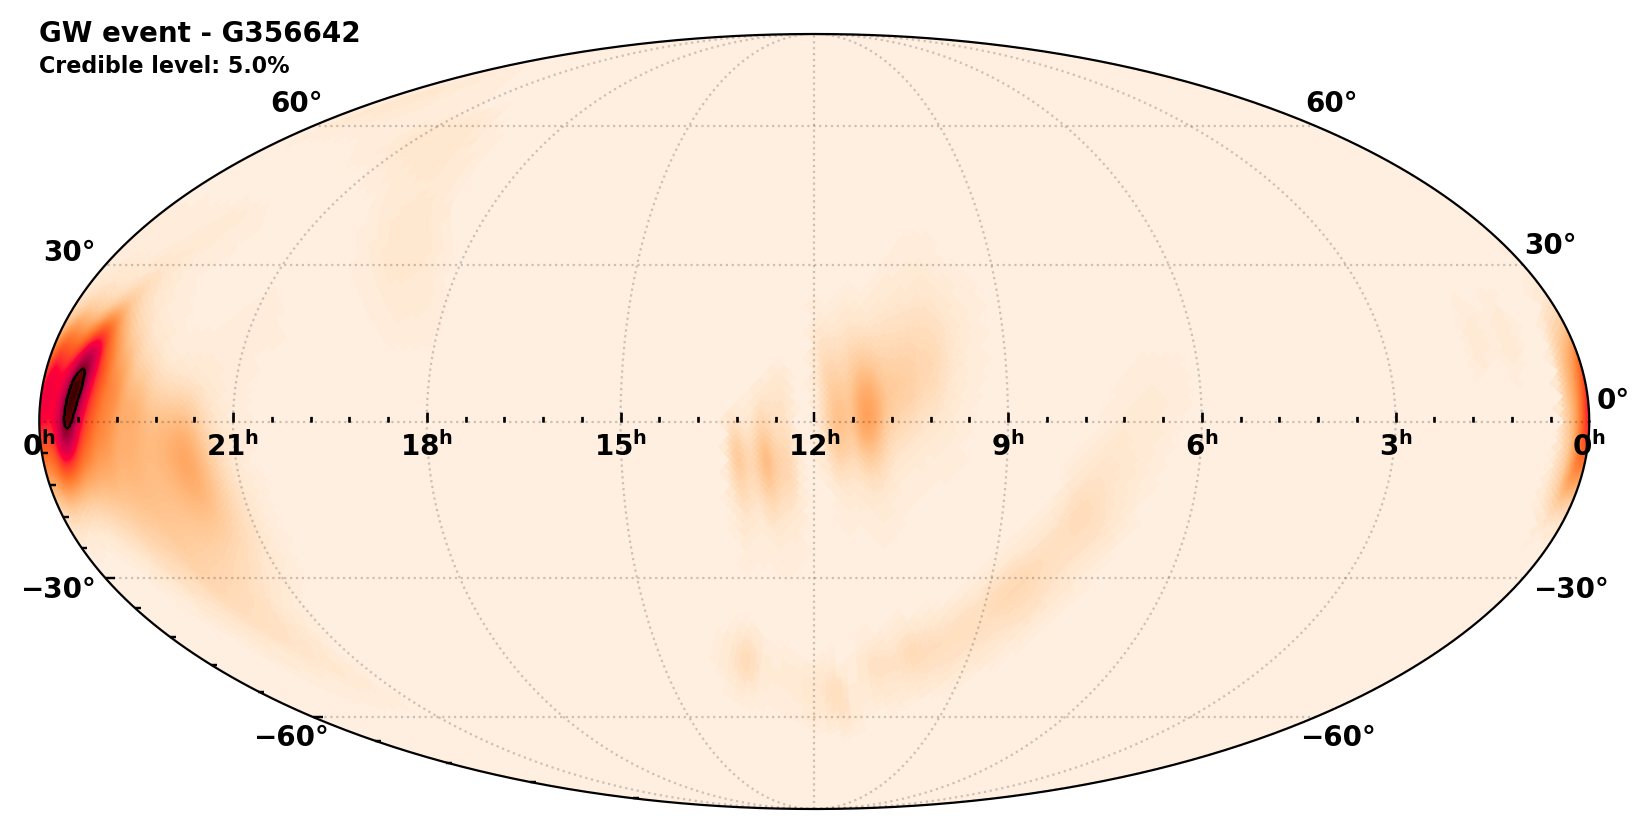

In [5]:
output_file = f"./figures/{event_name}_bayestar.png" # Set the output file

astro.show_contours_from_gw_bayestar(input_file, #Give the input file
                                    contours=contours, # Give the contours
                                    credible_level=credible_level, # Give the credible level
                                    cmap='cylon', # Set the colormap
                                    contours_color='black', # Set the contours color
                                    save_figure=output_file # Set file to save the figure
                                    )

---
## <a id='query'>2. Query the ESO Archive to collect data within the contours </a>

Now it is time to run the proper query to the Archive to obtain all data located within the contour regions. To do this you have two options:
* [Archive Science Portal](http://archive.eso.org/scienceportal/home)
* [Programmatic access](http://archive.eso.org/programmatic/)

There is, however, one last step before doing this. You need to convert the contours into polygons. This is done with:
```python
archive_observations.contours_to_polygons(contours, max_vertices=30)
```
where `max_vertices` is set to avoid crashes due to polygons with too many vertices in the queries.

In [5]:
polygons = polygons.contours_to_polygons(contours, max_vertices=30) # max_vertices is the maximum number of vertices for each polygon

Only one contour found - outputting single polygon


The resulting `polygons` is a list with N elements (with N matching the number of contours). Each elements contains a string defining the location in the sky of the polygon with RA, Dec, seprated by commas and with the first RA, Dec pair that matches the last one (to close the polygon). For instance:

In [6]:
polygons # Each polygon is a list of vertices
# Note use polygons[0] etc if more than one polygon is present... 

['351.2109, 9.8969, 351.3867, 10.0484, 351.5625, 9.8969, 351.7383, 9.7455, 351.9140, 9.5941, 352.0898, 9.4428, 352.2656, 9.2916, 352.4414, 9.1404, 352.6172, 8.9893, 352.4414, 8.8383, 352.6172, 8.6873, 352.7930, 8.5364, 352.9687, 8.3856, 352.7930, 8.2348, 352.9687, 8.0840, 353.1445, 7.9334, 352.9687, 7.7827, 353.1445, 7.6322, 353.3203, 7.4817, 353.1445, 7.3312, 353.3203, 7.1808, 353.1445, 7.0304, 353.3203, 6.8801, 353.4961, 6.7298, 353.3203, 6.5796, 353.4961, 6.4294, 353.3203, 6.2793, 353.4961, 6.1292, 353.6719, 5.9792, 353.4961, 5.8292, 353.6719, 5.6792, 353.4961, 5.5293, 353.6719, 5.3794, 353.4961, 5.2296, 353.6719, 5.0797, 353.8476, 4.9300, 353.6719, 4.7802, 353.8476, 4.6305, 353.6719, 4.4808, 353.8476, 4.3312, 354.0234, 4.1815, 353.8476, 4.0320, 354.0234, 3.8824, 353.8476, 3.7328, 354.0234, 3.5833, 353.8476, 3.4338, 354.0234, 3.2844, 353.8476, 3.1349, 354.0234, 2.9855, 354.1992, 2.8361, 354.0234, 2.6867, 354.1992, 2.5374, 354.0234, 2.3880, 354.1992, 2.2387, 354.0234, 2.0894, 354.199

### <a id='science_archive'>2.1 Archive Science Portal Query </a>

After running:
```python
archive_observations.query_ASP_from_polygons(polygons=polygons, open_link=True)
```
you should see different ASP pages opening in your broswer (one per polygon) pointing to the different regions of the sky you are quering.

In [7]:
archive_science_portal.query_from_polygons(polygons=polygons, open_link=True) # Open the query in the browser

### <a id='programmatic'>2.2 Programmatic access </a>

```python
archive_observations.query_TAP_from_polygons(polygons=polygons)
```
returns the result of the query:
```SQL
SELECT
   target_name, dp_id, s_ra, s_dec, t_exptime, em_min, em_max, 
   dataproduct_type, instrument_name, abmaglim, proposal_id
FROM
   ivoa.ObsCore
WHERE
   intersects(s_region, POLYGON('', `polygon`)) = 1
```
for convenince `maxrec` is set to `2` so only the first two results are returned, but you may want to increase this value.

In [8]:
result_from_query = archive_observations.query_from_polygons(polygons=polygons, maxrec=2, verbose=False) # Query the archive

[WORKING] :: Running query 1 to the ESO archive (out of 1 total)
[INFO]    :: A total of 2 entries has been retrieved (with maxrec=2)
[INFO]    :: For the following instrument:
[INFO]    ::  - HARPS


### <a id='download'>2.3 Download the cutout Archive Data Products </a>

Now, as in the other notebook examples, you can simple download the data by exploring the `dp_id` of the results: 

In [9]:
result_from_query.show_in_notebook(show_row_index=False) # Show the result in a notebook

target_name,dp_id,s_ra,s_dec,t_exptime,em_min,em_max,dataproduct_type,instrument_name,obstech,abmaglim,proposal_id,obs_collection
,,deg,deg,s,m,m,,,,mag,,
GJ899,ADP.2014-09-25T15:33:06.990,353.514826,0.17471,900.005,3.78115e-07,6.91222e-07,spectrum,HARPS,ECHELLE,--,183.C-0437(A),HARPS
GJ899,ADP.2014-09-25T15:33:09.363,353.514885,0.17602,899.999,3.7817e-07,6.91305e-07,spectrum,HARPS,ECHELLE,--,183.C-0437(A),HARPS


In [10]:
archive_observations.download(result_from_query['dp_id'][0], output_dir=output_dir) # Download the first data product

[INFO]    :: Your disk has:
[INFO]    :: Total: 926.35 GB, Used: 680.11 GB, Free: 246.24 GB
[WORKING] :: Retrieving file ADP.2014-09-25T15:33:06.990.fits
[INFO]    :: File ADP.2014-09-25T15:33:06.990.fits downloaded
